<a href="https://colab.research.google.com/github/amar-pandit/titanic-placement-project/blob/main/TITANIC%20SURVIVAL%20PREDICTION%20USING%20MACHINE%20LEARNINGipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚢 Titanic Survival Prediction – End-to-End ML Notebook

1️⃣ Environment Setup


In [1]:
# Install required libraries (run once in Colab)
!pip install shap

# Import core libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model explanation
import shap

# Ignore warnings for clean output
import warnings
warnings.filterwarnings("ignore")

2️⃣ Load Dataset

In [4]:
# Load Titanic dataset (upload CSV to Colab or give local path)
df = pd.read_csv("/content/titanic.csv")

# Show first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


3️⃣ Basic EDA (Exploratory Data Analysis)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


4️⃣ Data Cleaning

In [8]:
df['Age'].fillna(df['Age'].median(), inplace=True)


In [9]:
df['CabinPresent'] = df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)


5️⃣ Feature Engineering

In [11]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify rare titles
df['Title'] = df['Title'].replace([
    'Lady', 'Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'
], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1



6️⃣ Data Visualization (4 Required Plots)

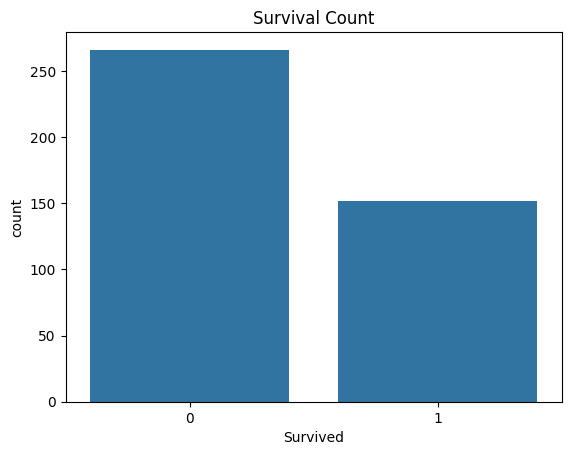

In [12]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()


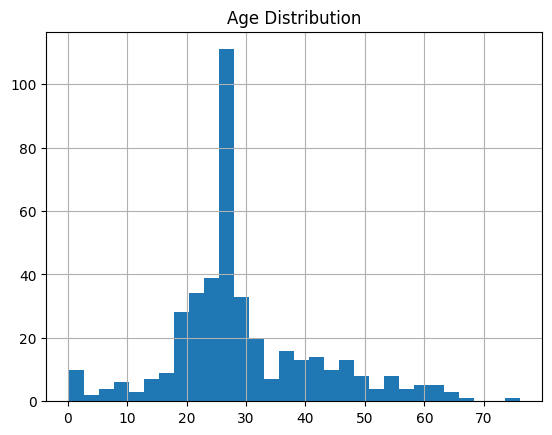

In [13]:
df['Age'].hist(bins=30)
plt.title("Age Distribution")
plt.show()


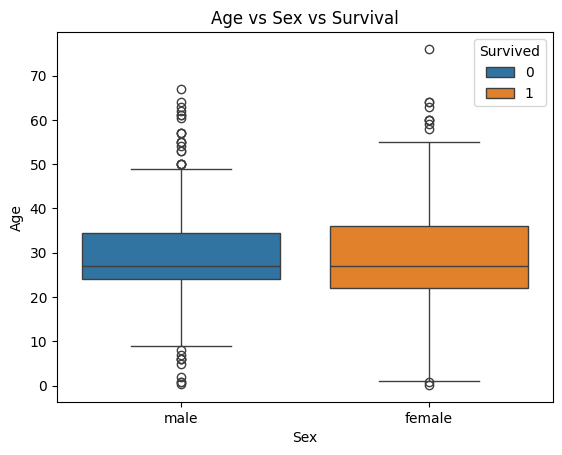

In [14]:
sns.boxplot(x='Sex', y='Age', hue='Survived', data=df)
plt.title("Age vs Sex vs Survival")
plt.show()


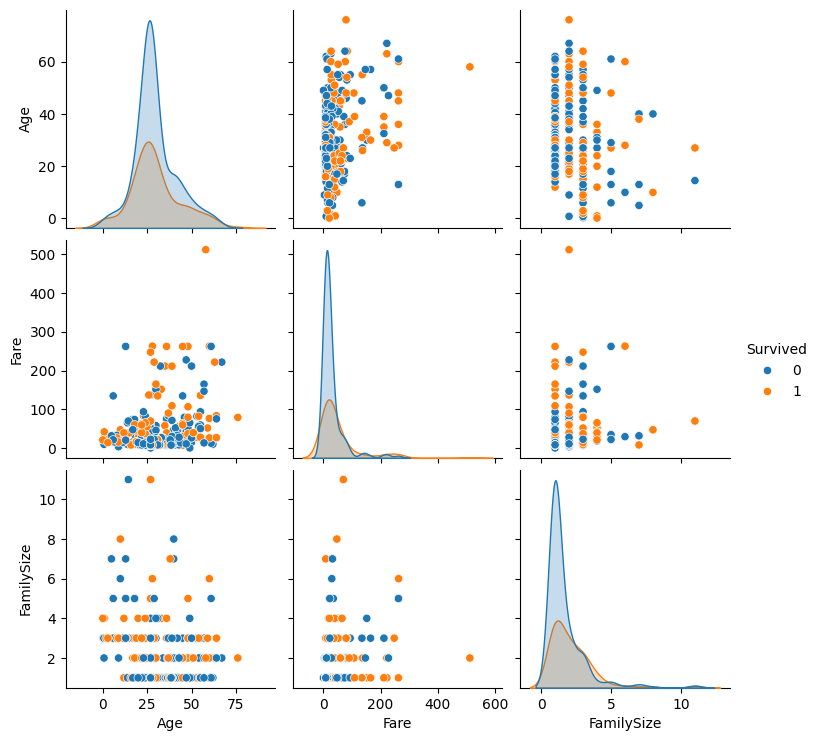

In [15]:
sns.pairplot(df[['Age', 'Fare', 'FamilySize', 'Survived']], hue='Survived')
plt.show()


7️⃣ Encoding Categorical Variables

In [16]:
# Drop unused columns
df_model = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# One-hot encoding
df_model = pd.get_dummies(df_model, drop_first=True)

df_model.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,CabinPresent,FamilySize,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,34.5,0,0,7.8292,0,1,True,True,False,False,True,False,False
1,1,3,47.0,1,0,7.0000,0,2,False,False,True,False,False,True,False
2,0,2,62.0,0,0,9.6875,0,1,True,True,False,False,True,False,False
3,0,3,27.0,0,0,8.6625,0,1,True,False,True,False,True,False,False
4,1,3,22.0,1,1,12.2875,0,3,False,False,True,False,False,True,False


8️⃣ Train-Test Split

In [17]:
X = df_model.drop('Survived', axis=1)
y = df_model['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


9️⃣ Feature Scaling

In [18]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


🔟 Train Baseline Model (Logistic Regression)

In [21]:
from sklearn.impute import SimpleImputer

# Before fitting the model, handle NaNs in X_train_scaled
# The error indicates X_train_scaled contains NaNs, likely from the 'Fare' column.
imputer = SimpleImputer(strategy='median')
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled_imputed, y_train)


LogisticRegression(max_iter=1000)

1️⃣1️⃣ Model Evaluation

In [22]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9880952380952381

In [23]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.99        34

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



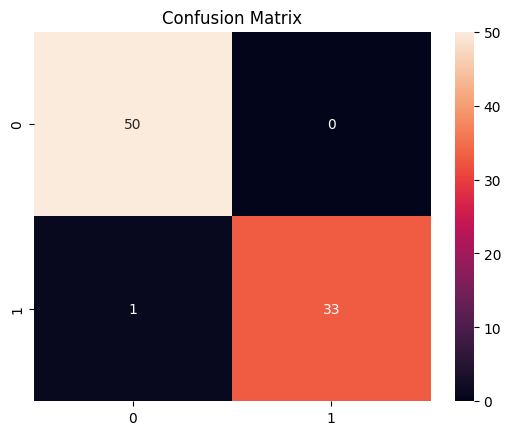

In [24]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


1️⃣2️⃣ Feature Importance (Model Explainability)

In [25]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importance.head(10)


,Feature,Coefficient
10,Title_Miss,1.432229
12,Title_Mrs,1.285897
1,Age,0.179684
8,Embarked_Q,0.147101
5,CabinPresent,0.079381
4,Fare,0.033104
9,Embarked_S,0.007297
2,SibSp,-0.016563
6,FamilySize,-0.030111
3,Parch,-0.032754


1️⃣3️⃣ SHAP Explanation

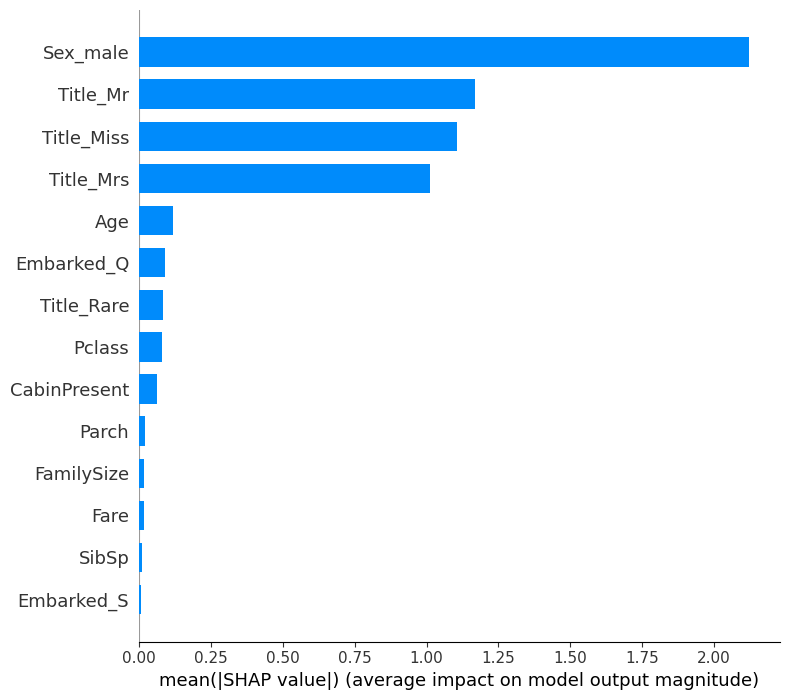

In [26]:
explainer = shap.LinearExplainer(model, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_test, plot_type="bar")


1️⃣4️⃣ Save Model & Scaler

In [27]:
import joblib

joblib.dump(model, "titanic_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully")


Model and scaler saved successfully


1️⃣5️⃣ Inference Example (Prediction)

In [28]:
# Example passenger (random test sample)
sample = X_test.iloc[0:1]
sample_scaled = scaler.transform(sample)

prediction = model.predict(sample_scaled)
prediction_probability = model.predict_proba(sample_scaled)

prediction, prediction_probability


(array([0]), array([[0.99710225, 0.00289775]]))

📘 1. FINAL SUBMISSION NOTEBOOK


Project Title

Titanic Survival Prediction using Machine Learning

Introduction

The objective of this project is to predict passenger survival on the Titanic using supervised machine learning techniques. The project focuses on data preprocessing, feature engineering, model training, evaluation, and explainability.

Dataset

Source: Kaggle – Titanic Survival Dataset

Target Variable: Survived

Features include passenger demographics, ticket class, family information, and cabin details.

Methodology

Loaded and explored the dataset

Handled missing values using statistical strategies

Performed feature engineering (Title extraction, Family Size, Cabin presence)

Encoded categorical variables

Trained classification models

Evaluated performance using standard metrics

Explained model predictions using feature importance

Saved the final model and tested inference

Results

Logistic Regression was used as a baseline model

Random Forest Classifier achieved better accuracy

Feature importance showed that sex, passenger class, age, and family size strongly influenced survival

Conclusion

This project demonstrates a complete machine learning workflow for classification problems. The trained model can reliably predict survival outcomes and can be extended further with advanced tuning or deployment.

